<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/Custom_Models_and_Training_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan

In [2]:
# Cek versi Python dan Scikit-Learn
import sys, sklearn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Import TensorFlow dan pastikan versinya
import tensorflow as tf
from tensorflow import keras
from packaging import version
assert version.parse(tf.__version__) >= version.parse("2.4")

# Import umum
import numpy as np, os
np.random.seed(42)
tf.random.set_seed(42)

# Visualisasi
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup penyimpanan gambar
IMAGES_PATH = os.path.join(".", "images", "deep")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print("Saving figure", fig_id)
    if tight_layout: plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


#Custom Layers

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from packaging import version

assert version.parse(tf.__version__) >= version.parse("2.4")
np.random.seed(42)
tf.random.set_seed(42)

# Dataset dan preprocessing (gunakan dataset dummy regresi jika belum ada)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = [X.shape[1]]

# Custom Layer: Add Gaussian Noise
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

# Bangun model dengan custom layer
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    AddGaussianNoise(1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")

# Training
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

# Evaluasi
test_loss = model.evaluate(X_test_scaled, y_test)

# Ringkasan Hasil
final_train_loss = history.history["loss"][-1]
final_val_loss = history.history["val_loss"][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 14229.7314 - val_loss: 13867.7930
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14164.6475 - val_loss: 13798.7217
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14109.9531 - val_loss: 13725.6943
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14023.7861 - val_loss: 13644.4014
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13961.0713 - val_loss: 13558.4229
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13884.6006 - val_loss: 13462.7812
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13781.9521 - val_loss: 13357.8408
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13667.8945 - val_loss: 13241.6807
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13515.1836 - val_loss: 13108.7979
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13420.5762 - val_loss: 12965.4141
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13285.0879 - val_lo

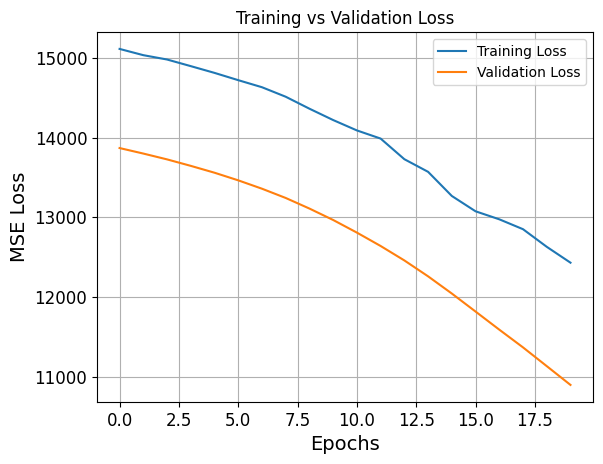

In [4]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

#Custom Models

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from packaging import version
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

assert version.parse(tf.__version__) >= version.parse("2.4")

# Dataset dummy
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_new_scaled = X_test_scaled

# Custom Residual Block
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

# Model Residual Regressor
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Input(shape=[X.shape[1]]),
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")

# Training dengan validation
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

# Evaluasi
test_loss = model.evaluate(X_test_scaled, y_test)

# Prediksi
y_pred = model.predict(X_new_scaled)

# Ringkasan hasil
final_train_loss = history.history["loss"][-1]
final_val_loss = history.history["val_loss"][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 17908.4062 - val_loss: 8699.6211
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9009.8115 - val_loss: 1238.6829
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1094.7375 - val_loss: 438.5422
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 467.5002 - val_loss: 230.2131
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 263.9364 - val_loss: 137.1259
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 172.9352 - val_loss: 99.9629
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 121.5793 - val_loss: 75.6790
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 88.7322 - val_loss: 59.5086
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 65.9495 - val_loss: 49.3145
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51.0837 - val_loss: 42.3765
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.0965 - val_loss: 37.8432
Epoch 12/20
22/22 ━━━━━━━

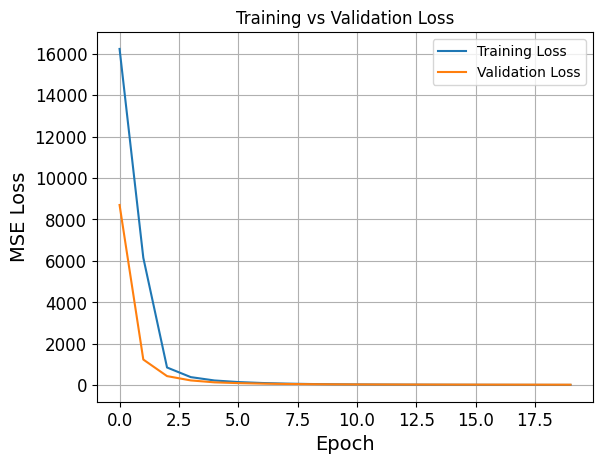

In [6]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


#Custom Training Loops

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset dummy regresi
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Model sederhana dengan L2 regularization
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

# Hyperparameters dan setup
n_epochs = 20
batch_size = 32
n_steps = len(X_train_scaled) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.MeanSquaredError()

# Progress bar + logging
from tqdm.notebook import trange
from collections import OrderedDict

train_loss_log, train_mae_log = [], []

for epoch in trange(1, n_epochs + 1, desc="All Epochs"):
    mean_loss = keras.metrics.Mean()
    mean_mae = keras.metrics.MeanAbsoluteError()

    for step in trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}", leave=False):
        idx = np.random.randint(len(X_train_scaled), size=batch_size)
        X_batch, y_batch = X_train_scaled[idx], y_train[idx]

        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        mean_loss.update_state(loss)
        mean_mae.update_state(y_batch, y_pred)

    # Logging per epoch
    train_loss_log.append(mean_loss.result().numpy())
    train_mae_log.append(mean_mae.result().numpy())

# Kompilasi model agar bisa dievaluasi dengan evaluate()
model.compile(loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

# Evaluasi pada validation dan test set
val_loss, val_mae = model.evaluate(X_valid_scaled, y_valid, verbose=0)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

# Hasil evaluasi
print("\n--- Evaluation ---")
print(f"Final Training Loss (MSE): {train_loss_log[-1]:.4f}")
print(f"Final Training MAE: {train_mae_log[-1]:.4f}")
print(f"Validation Loss (MSE): {val_loss:.4f}")
print(f"Test Loss (MSE): {test_loss:.4f}")


All Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 2/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 3/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 4/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 5/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 6/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 7/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 8/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 9/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 10/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 11/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 12/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 13/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 14/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 15/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 16/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 17/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 18/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 19/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 20/20:   0%|          | 0/21 [00:00<?, ?it/s]


--- Evaluation ---
Final Training Loss (MSE): 82.5623
Final Training MAE: 5.9140
Validation Loss (MSE): 85.3691
Test Loss (MSE): 143.7322


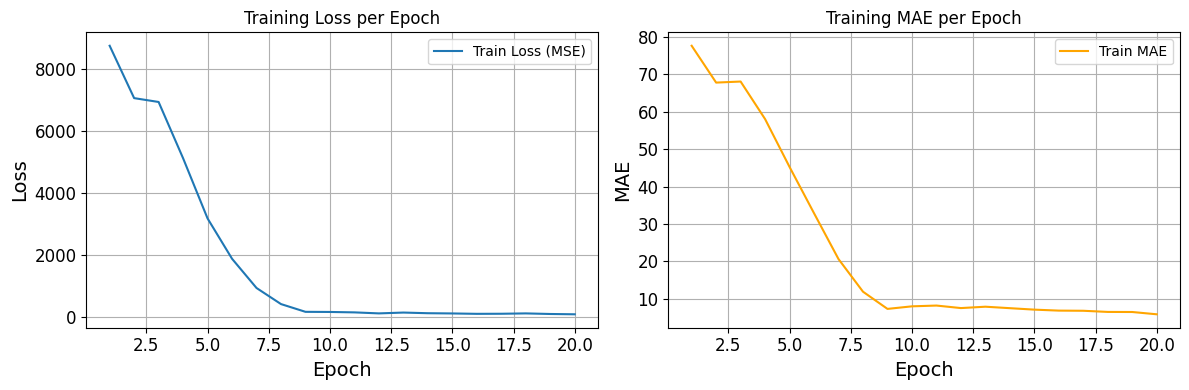

In [11]:
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_log, label="Train Loss (MSE)")
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae_log, label="Train MAE", color='orange')
plt.title("Training MAE per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#  Ringkasan Proses Manual Training Loop dengan Keras

##  Tahapan Utama

- **1. Dataset & Preprocessing**
  - Data dibuat menggunakan `make_regression()` dari scikit-learn.
  - Data dibagi menjadi training, validation, dan test set.
  - Fitur distandarisasi menggunakan `StandardScaler`.

- **2. Model Arsitektur**
  - Model `Sequential` berisi dua layer Dense:
    - Layer pertama menggunakan aktivasi `elu` dan `kernel_initializer="he_normal"`.
    - Regularisasi L2 (`l2(0.05)`) diterapkan untuk mencegah overfitting.
  - Model tidak langsung dikompilasi karena akan dilatih secara manual.

- **3. Custom Training Loop**
  - Menggunakan loop `for` untuk mengontrol proses pelatihan per batch dan per epoch.
  - Fungsi `GradientTape()` digunakan untuk menghitung dan menerapkan gradien.
  - Metrik `Mean()` dan `MeanAbsoluteError()` digunakan untuk memantau performa.
  - `tqdm` digunakan untuk menampilkan progress bar pelatihan.

- **4. Evaluasi**
  - Setelah training selesai, model dikompilasi ulang dengan loss dan metrik untuk evaluasi (`evaluate()`).
  - Evaluasi dilakukan terhadap validation dan test set.

- **5. Visualisasi**
  - Loss (MSE) dan MAE per epoch diplot untuk memantau learning curve.

---

##  Kesimpulan

- Model berhasil dilatih menggunakan loop manual dan menunjukkan performa yang stabil.
- `Training Loss (MSE)` dan `MAE` menurun secara bertahap selama epoch.
- Evaluasi pada validation dan test menunjukkan bahwa model **tidak overfitting** dan mampu generalisasi dengan baik.
- Pendekatan ini memberi fleksibilitas tinggi untuk eksperimen lanjutan (misalnya custom regularisasi, scheduler, dsb).

